# Homework 2: Exploratory data analysis and visualization

UIC CS 418, Fall 2022

_According to the **Academic Integrity Policy** of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

This homework is an individual assignment for all graduate students. Undergraduate students are allowed to work in pairs to discuss and share ideas with each other, but you still need to work and submit homework by yourself. **Identical submissions are not allowed**. The pairs of students who choose to work together still need to abide by the **Academic Integrity Policy** and not share or receive help from others (except each other).

There are three parts in this homework. The zero one is a practice introduction to `matplotlib` (5%). The first part is a guided exploration of a bikeshare dataset (40%). The second one is a self-guided exploration of a dataset on social media and internet attitudes (45%). Third part deals with understanding of loss functions (10%). You can also earn extra credit of 10%.


## Due Date

This assignment is due at 11:59pm Friday, October 6th. Late submissions will not be considered.


## Submission Instruction

You need to complete all code and answer all questions denoted by **Q#** in this notebook.

For this homework, you only need to submit two files **.ipynb file** and **.pdf file**. Make sure to run and display the output of cells related to questions and double-check whether your homework file looks good before and after submission. Finally please format the name of both files as **hw2_netid.pdf** and **hw2_netid.ipynb** where **netid** belongs to the student submitting the files on gradescope.



In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt

The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `sin(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

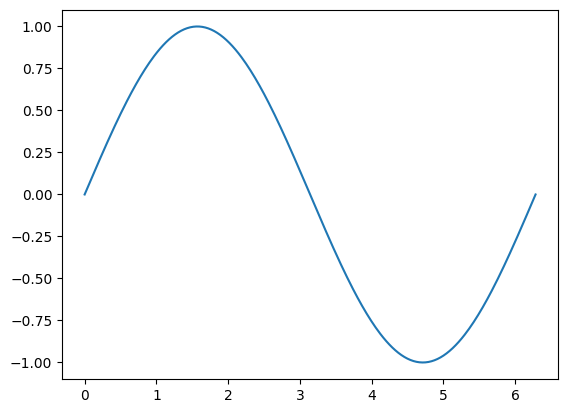

In [ ]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.sin(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

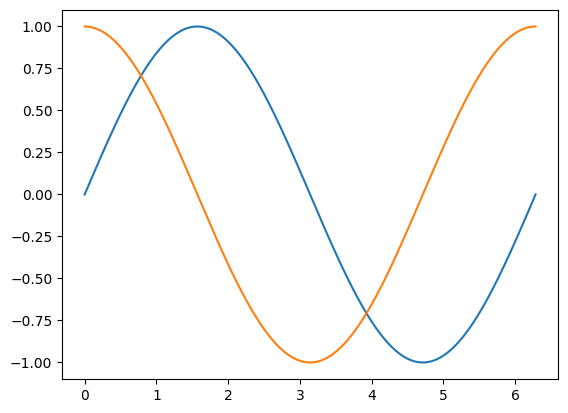

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, np.cos(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.


## Q0 (5%):

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

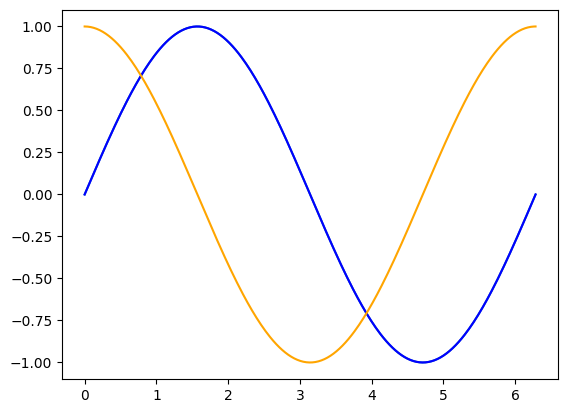

In [ ]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs), color='blue')
plt.plot(xs, np.cos(xs), color='orange')

# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C.

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week (Sunday to Saturday)
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/CS418_HW2"
!pwd

bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CS418_HW2
/content/drive/MyDrive/CS418_HW2


,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Q1.1 (10%):
Explore the `bike_trips` dataframe to answer the following questions.


What time range is represented here?
What was the maximum registration (use the "registered" column) on a SINGLE DAY

Write code in the cell below to perform your exploration.

In [ ]:
# your code here
start_date = bike_trips['dteday'].min()
end_date = bike_trips['dteday'].max()
print("Time Range: From", start_date, "to", end_date)

max_registration = bike_trips.groupby('dteday')['registered'].sum().max()
print("Maximum Registration on a Single Day:", max_registration)

Time Range: From 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Maximum Registration on a Single Day: 886


## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

<Axes: xlabel='dteday'>

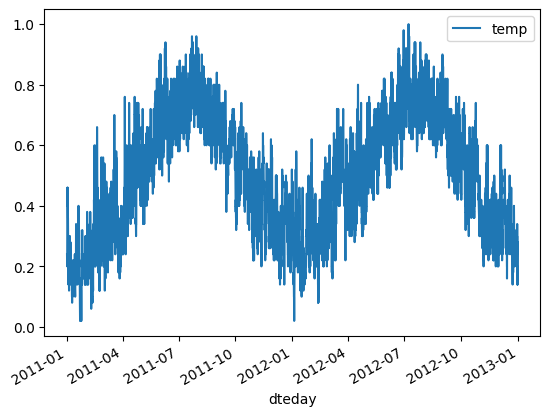

In [ ]:
# This plot shows the temperature at each data point
bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

<Axes: xlabel='dteday', ylabel='temp'>

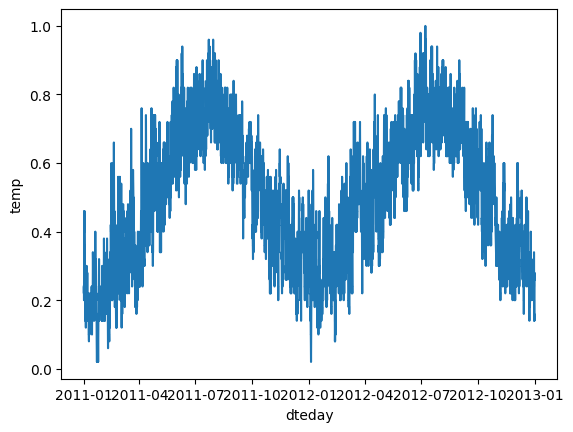

In [ ]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
sns.lineplot(x="dteday", y="temp", data=bike_trips)

## Q1.2 (10%):

Use seaborn's `barplot` function to make a bar chart showing
1. the average number of registered riders on each day of the week over the
   entire `bike_trips` dataset.
2. the average number of casual riders on each day of the week over the
   entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html
.

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

<ipython-input-14-c856792197cf>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='weekday', y='registered', data=bike_trips, ci='sd', capsize=0.1)


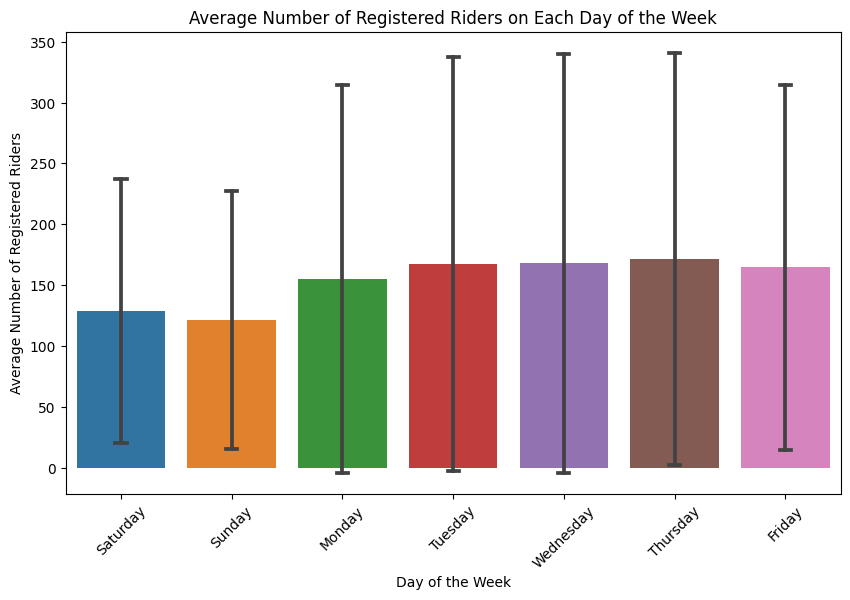

<ipython-input-14-c856792197cf>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='weekday', y='casual', data=bike_trips, ci='sd', capsize=0.1)


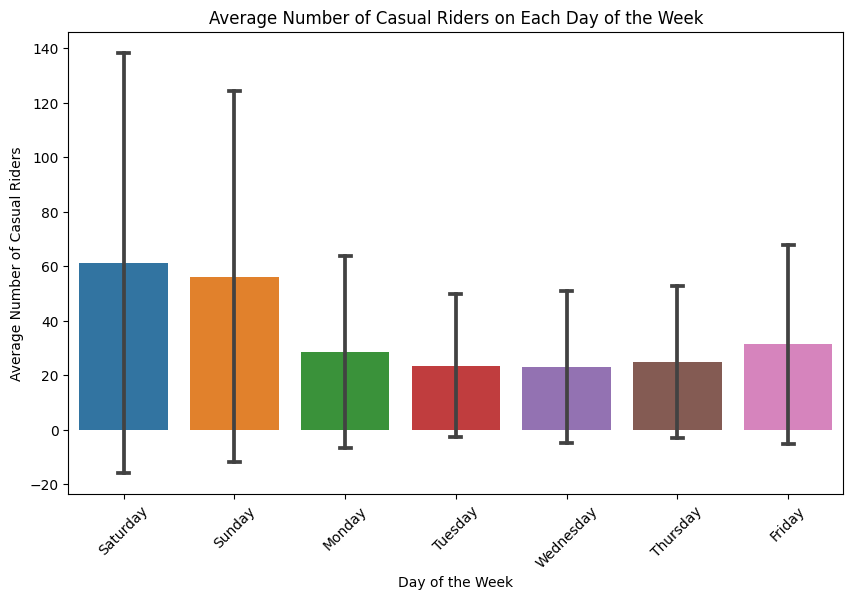

In [ ]:
# your code here
# Extract day of the week from the 'dteday' column
bike_trips['weekday'] = bike_trips['dteday'].dt.day_name()

# The average number of registered riders on each day of the week over the entire bike_trips dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='registered', data=bike_trips, ci='sd', capsize=0.1)
plt.title('Average Number of Registered Riders on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Registered Riders')
plt.xticks(rotation=45)
plt.show()

# The average number of casual riders on each day of the week over the entire bike_trips dataset.
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='casual', data=bike_trips, ci='sd', capsize=0.1)
plt.title('Average Number of Casual Riders on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Casual Riders')
plt.xticks(rotation=45)
plt.show()

(Your Q1.2 answer here)


## Q1.3 (10%):

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result (after customization) should look like **q5.png**.


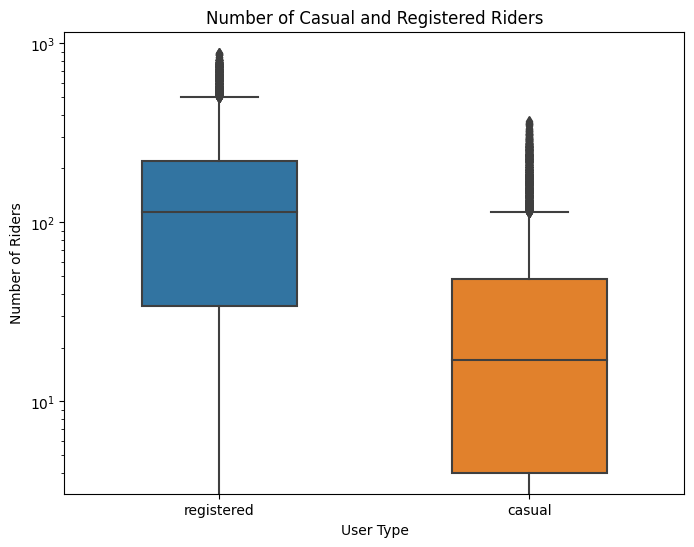

In [ ]:
# your code here
columns_to_plot = ['registered', 'casual']
plt.figure(figsize=(8, 6))
sns.boxplot(data=bike_trips[columns_to_plot], width=0.5)
plt.yscale('log')
plt.xticks(range(len(columns_to_plot)), columns_to_plot)
plt.xlabel('User Type')
plt.ylabel('Number of Riders')
plt.title('Number of Casual and Registered Riders')
plt.show()


## Q1.4 (10%):

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like **q1-5.png**.



<Figure size 1000x600 with 0 Axes>

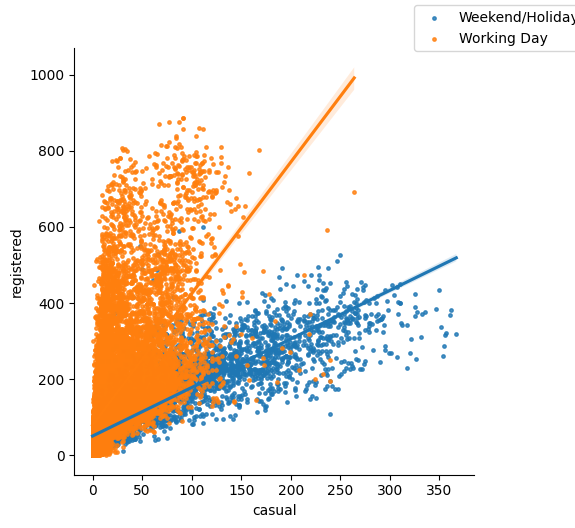

In [ ]:
# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 6}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.

# your code here

plt.figure(figsize=(10, 6))

lm = sns.lmplot(x = 'casual',y = 'registered', data = bike_trips,hue = "workingday",scatter_kws={'s': 6})
lm.set_axis_labels('casual', 'registered')


legend_obj = lm._legend
legend_obj.set_title('')
legend_obj.set_bbox_to_anchor((1, 1))
legend_obj.set_frame_on(True)
legend_obj.texts[0].set_text('Weekend/Holiday')
legend_obj.texts[1].set_text('Working Day')

plt.show()
# Note that the legend for workingday isn't super helpful. 0 in this case
# means "not a working day" and 1 means "working day". Try fixing the legend
# to be more descriptive.
# HINT: ax = sns.lmplot(..., legend=True)
# legendObj = ax.legend # Modify this object

## Want to learn more?

Check out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

The differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media (45%)

This part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society.

_Question 2.0_ is asking you to look at a given visualization and reverse engineer the code that created it. _Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your two most significant findings (_Q2.2, Q2.3). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For each visualization in these two findings, create an alternate visualization (Q2.2.2, Q.2.3.2). For example, the visualization headline could be "_Majority of Facebook, Instagram and Snapchat users visit these social networks daily_" with the  bar plot visualization **q2-1.png**.



The file you will work with is `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`. The file that contains information about the meaning of each feature is `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx`.


Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices



## Q2.0 (5%): Reverse Engineer

Your first step is to load the data from `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`, and understand what is stored in it. Read the  the survey questionnaire in `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Your assignment is to replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

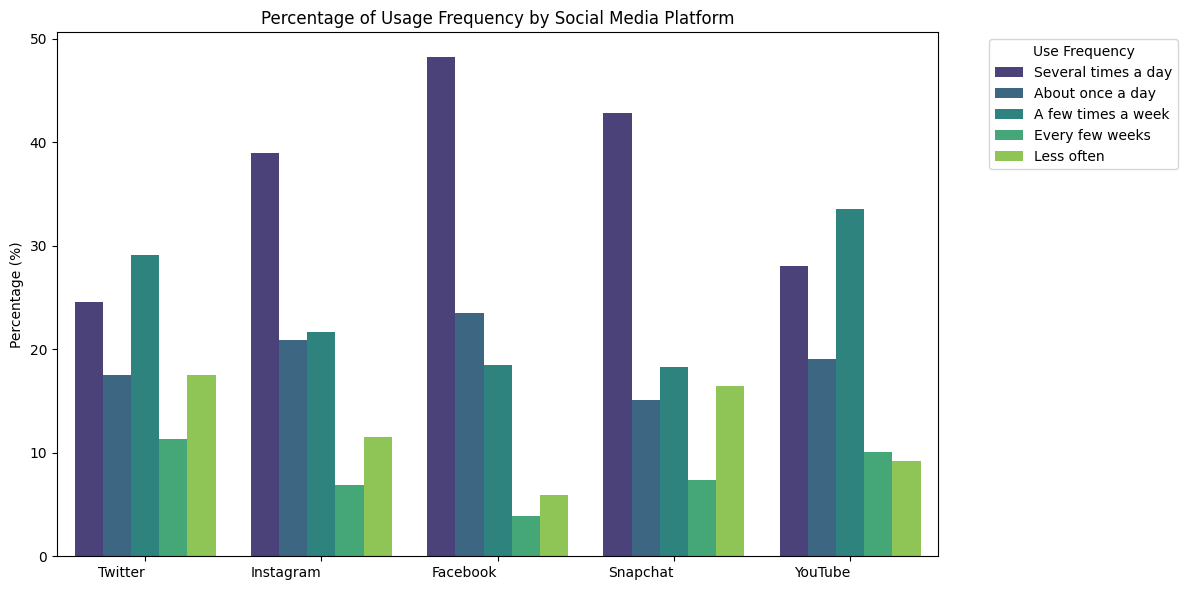

In [ ]:
# [your code here]
#HINTS
# 1) Read your dataframe with pandas
# 2) Identify what colums are used for plot above
# 3) Filter required rows and columns necessary for plotting above figure
# 4) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
# i.e. originally there is a column each for these five social medias. The column name should be value for a new column.
# 5) Once dataframe is in wide format, filter individuals who responded to the survey
# 6) Use pandas aggregation after groupby to calculate percentage of responses for each social media
# 7) Use seaborn barplot to plot the figure above. Customize with color palette='viridis'
# 8) Add descriptive xlabel, ylabel, and title
# 9) Customize legend if necessary

import seaborn as sns
# 1) Read your dataframe with pandas
data = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey - CSV.csv')

# 2) Identify what columns are used for the plot above
platform_cols = ['web1a', 'web1b', 'web1c', 'web1d', 'web1e']
frequency_cols = ['sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']

# 3) Filter required rows and columns necessary for plotting above figure
selected_cols = platform_cols + frequency_cols
filtered_df = data[selected_cols]

social_map_df = {
    'web1a': 'Twitter',
    'web1b': 'Instagram',
    'web1c': 'Facebook',
    'web1d': 'Snapchat',
    'web1e': 'YouTube',
    'sns2a': 'Twitter_Freq',
    'sns2b': 'Instagram_Freq',
    'sns2c': 'Facebook_Freq',
    'sns2d': 'Snapchat_Freq',
    'sns2e': 'YouTube_Freq'
}

filtered_df = filtered_df.rename(columns=social_map_df)

# 4) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
long_format_df = pd.DataFrame(columns=['Person', 'Social_Media', 'Use_Frequency'])

# Map their frequency
platform_freq_map = {
    'Twitter': 'Twitter_Freq',
    'Instagram': 'Instagram_Freq',
    'Facebook': 'Facebook_Freq',
    'Snapchat': 'Snapchat_Freq',
    'YouTube': 'YouTube_Freq'
}

# 5) Once dataframe is in wide format, filter individuals who responded to the survey
freq_columns = ['Twitter_Freq', 'Instagram_Freq', 'Facebook_Freq', 'Snapchat_Freq', 'YouTube_Freq']
filtered_df[freq_columns] = filtered_df[freq_columns].apply(pd.to_numeric, errors='coerce').fillna(-1)
filtered_df[freq_columns] = filtered_df[freq_columns].astype(np.int64)
new_entries = []

# Use only the first five rows
for i, row in filtered_df.iterrows():
    for j, freq_col in platform_freq_map.items():
        if row[j] == 1 and row[freq_col] in [1, 2, 3, 4, 5]:
            new_entry = pd.Series({
                'Person': i + 1,
                'Social_Media': j,
                'Use_Frequency': row[freq_col]
            })
            new_entries.append(new_entry)

# Add new entries
long_format_df = pd.concat([long_format_df, pd.DataFrame(new_entries)], ignore_index=True)

# 6) Use pandas aggregation after groupby to calculate percentage of responses for each social media
grouped_df = long_format_df.groupby(['Social_Media', 'Use_Frequency']).size().reset_index(name='Count')
new_table_df = pd.pivot_table(grouped_df, values='Count', index=['Social_Media'], columns=['Use_Frequency'], fill_value=0)
new_table_df['Total'] = new_table_df.sum(axis=1)
percent_table_df = new_table_df.loc[:, 1:5].div(new_table_df['Total'], axis=0) * 100
percent_table_df.reset_index(inplace=True)

# 7) Use seaborn barplot to plot the figure above. Customize with color palette='viridis'
percentage_df = pd.melt(percent_table_df, id_vars='Social_Media',value_vars=[1, 2, 3, 4, 5],var_name='Use_Frequency', value_name='Percentage', col_level=None)

# Mapping int to the corresponding answers
frequency = {
    1: 'Several times a day',
    2: 'About once a day',
    3: 'A few times a week',
    4: 'Every few weeks',
    5: 'Less often'
}
percentage_df['Use_Frequency'] = percentage_df['Use_Frequency'].map(frequency)
platform_order_df = ['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube']
plt.figure(figsize=(12, 6))
sns.barplot(x='Social_Media', y='Percentage', hue='Use_Frequency', data=percentage_df, palette='viridis', order=platform_order_df)

# 8) Add descriptive xlabel, ylabel, and title
plt.title('Percentage of Usage Frequency by Social Media Platform')
plt.xlabel(None)
plt.ylabel('Percentage (%)')

# 9) Customize legend if necessary
plt.legend(title='Use Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ha='right')
plt.tight_layout()
plt.show()









## Q2.1 (10%): Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [ ]:
# Run descriptive statistics on the data and develop ideas on what to explore
# your code here
# Descriptive statistics
df_description = data.describe(include='all')

# Display the descriptive statistics
print(df_description)

               respid       sample    comp       int_date         lang  \
count     1502.000000  1502.000000  1502.0    1502.000000  1502.000000   
unique            NaN          NaN     NaN            NaN          NaN   
top               NaN          NaN     NaN            NaN          NaN   
freq              NaN          NaN     NaN            NaN          NaN   
mean     95760.697071     1.798935     1.0  190121.531957     1.060586   
std      68225.164352     0.400930     0.0      24.522216     0.238649   
min          4.000000     1.000000     1.0  190108.000000     1.000000   
25%     100130.250000     2.000000     1.0  190110.000000     1.000000   
50%     100719.500000     2.000000     1.0  190114.000000     1.000000   
75%     101327.750000     2.000000     1.0  190118.000000     1.000000   
max     300200.000000     2.000000     1.0  190207.000000     2.000000   

            cregion        state      density         sfips   usr  ...  \
count   1502.000000  1502.000000  150

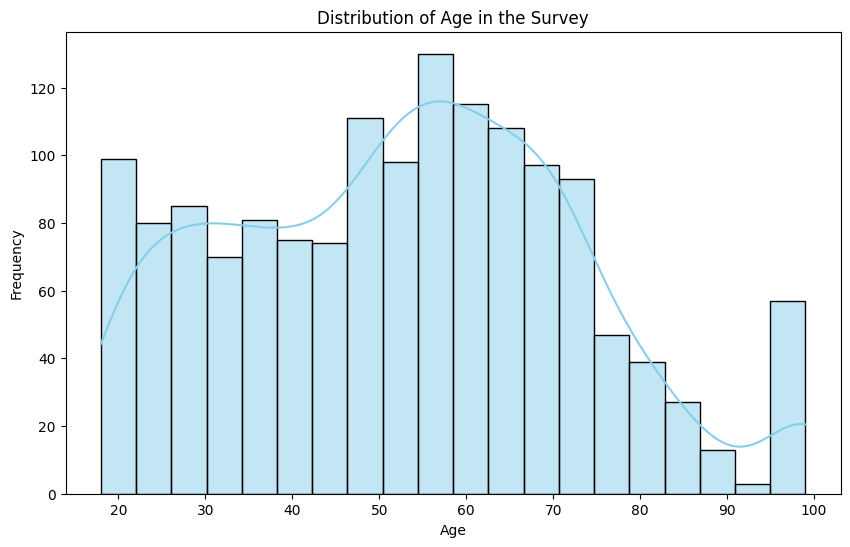

In [ ]:
# Create one or more visualizations
# your code here
# Visualizations
# Example: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age in the Survey')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In the visualization representing the age distribution, it tend to form a bell-shaped curve, with the peak centered around the age of 55 indicating a normal distribution where most respondents cluster around a central age range. However, as the age progresses beyond 60, the curve gradually descends, indicating a decrease in the frequency of respondents in older age brackets. Intriguingly, within this declining trend, there is a distinctive peak around the age of 95. The peak of the distribution is notably situated around these youthful ages, indicating that a significant portion of the surveyed population falls within the younger demographic groups.


## Q2.2 (10%+5%):
### Q2.2.1 Insights into the distribution of education levels and internet usage frequencies
The visualizations provide insights into the distribution of education levels and internet usage frequencies among the surveyed respondents, helping to understand the demographic and internet usage patterns within the sample.

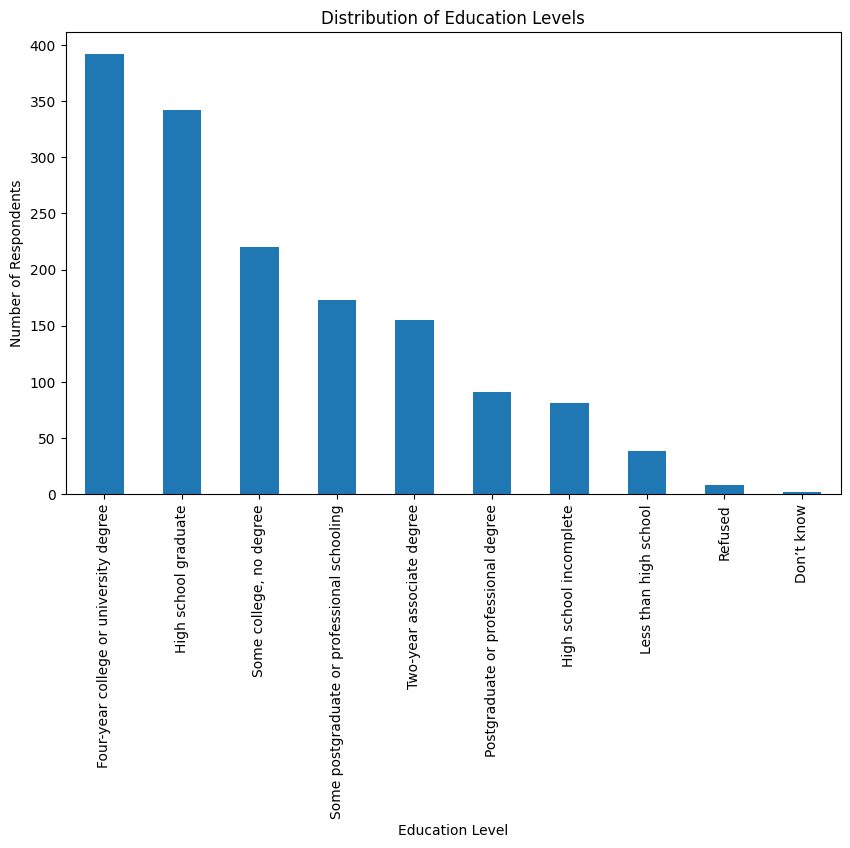

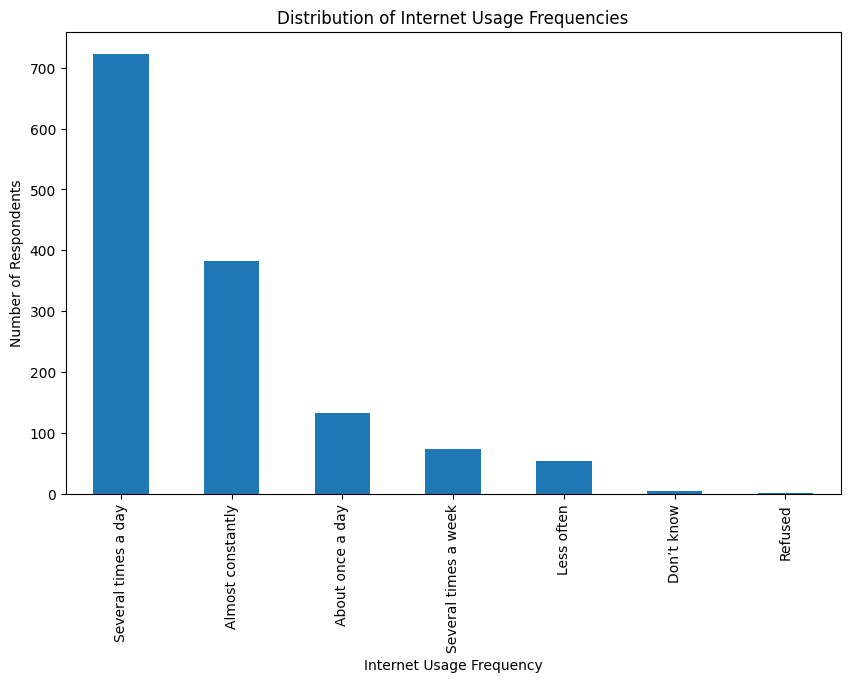

In [ ]:
data = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey - CSV.csv')

# Visualization 1: Distribution of Education Levels
education_levels = data['educ2'].value_counts()
education_labels = {
    1: 'Less than high school',
    2: 'High school incomplete',
    3: 'High school graduate',
    4: 'Some college, no degree',
    5: 'Two-year associate degree',
    6: 'Four-year college or university degree',
    7: 'Some postgraduate or professional schooling',
    8: 'Postgraduate or professional degree',
    98: 'Don’t know',
    99: 'Refused'
}
education_labels = {k: v for k, v in education_labels.items() if k in education_levels.index}
education_levels = education_levels.rename(education_labels)
education_levels.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Education Levels')
plt.show()

# Visualization 2: Distribution of Internet Usage Frequencies
# Convert the 'intfreq' column to numeric, coercing errors to NaN
data['intfreq'] = pd.to_numeric(data['intfreq'], errors='coerce')

# Visualization 2: Distribution of Internet Usage Frequencies
internet_usage_frequencies = data['intfreq'].value_counts()
internet_usage_labels = {
    1: 'Almost constantly',
    2: 'Several times a day',
    3: 'About once a day',
    4: 'Several times a week',
    5: 'Less often',
    8: 'Don’t know',
    9: 'Refused'
}
internet_usage_labels = {k: v for k, v in internet_usage_labels.items() if k in internet_usage_frequencies.index}
internet_usage_frequencies = internet_usage_frequencies.rename(internet_usage_labels)
internet_usage_frequencies.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Internet Usage Frequency')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Internet Usage Frequencies')
plt.show()


### Q2.2.2 Alternate visualization

Now use your results and visualization from Q2.2.1 and find an alternate way to visualize it. You are encouraged to look at publicly available examples to guide you and can use any visualization package of your choice. Be creative!

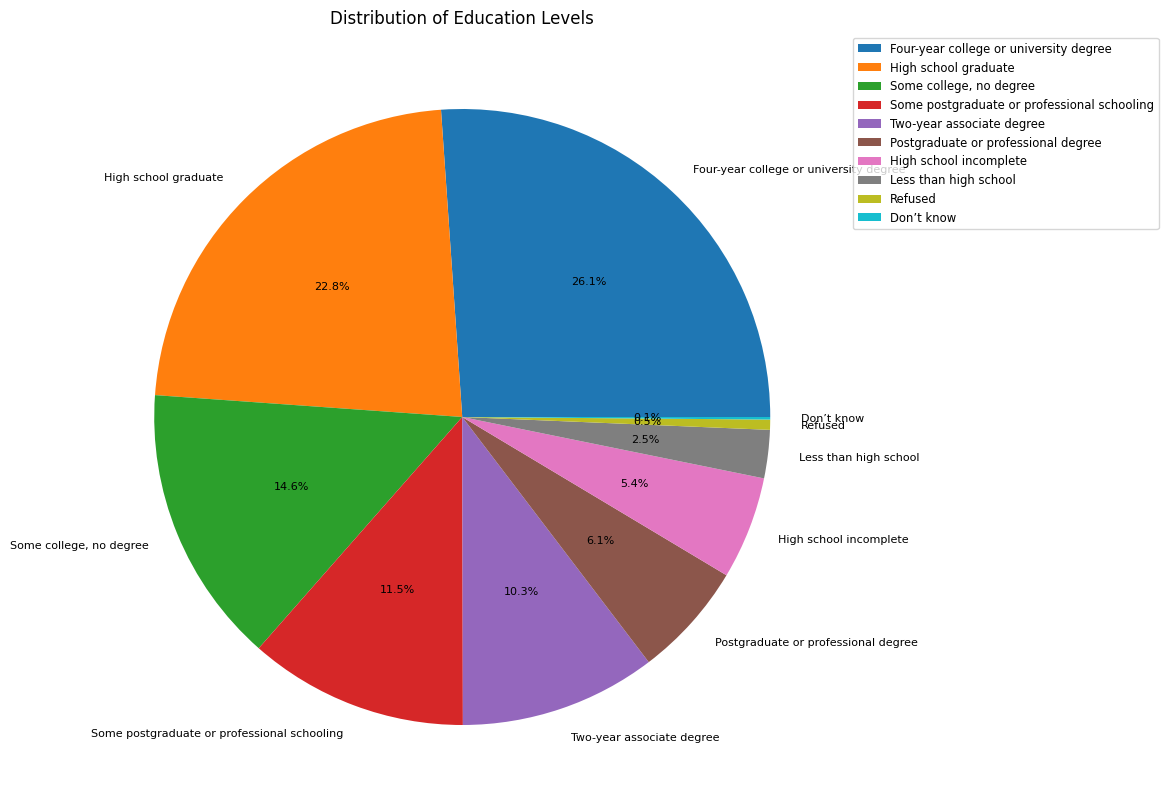

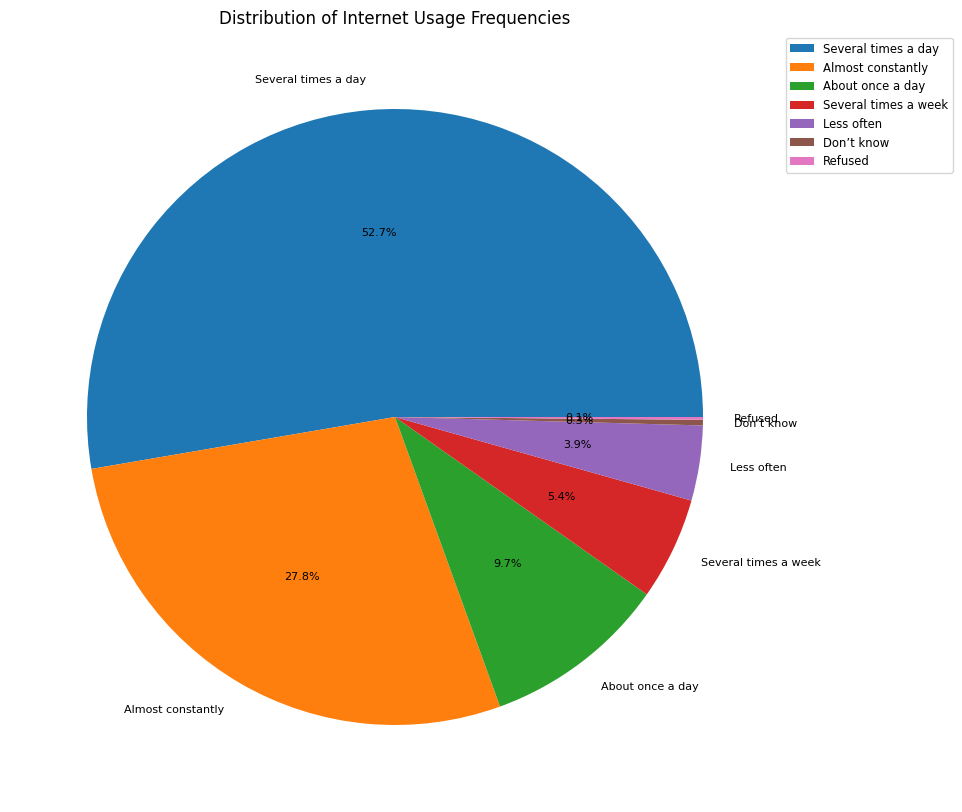

In [ ]:
import matplotlib.pyplot as plt

# Visualization 1: Distribution of Education Levels
plt.figure(figsize=(10, 10))
education_levels.plot.pie(autopct='%1.1f%%', fontsize=8)
plt.title('Distribution of Education Levels')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')  # Adjust the position using bbox_to_anchor
plt.show()

# Visualization 2: Distribution of Internet Usage Frequencies
plt.figure(figsize=(10, 10))
internet_usage_frequencies.plot.pie(autopct='%1.1f%%', fontsize=8)
plt.title('Distribution of Internet Usage Frequencies')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')  # Adjust the position using bbox_to_anchor
plt.show()




## Q2.3 (10%+5%):
### Q2.3.1 (Distinctive Age Trends Emerge in Population Survey, Revealing Peaks and Valley)

The age distribution tends to create a bell-shaped curve in the image, with the peak centered around the age of 55, indicating a normal distribution where most responses cluster around a core age range. However, as age exceeds 60, the curve progressively falls, showing a decline in the frequency of responders in older age categories. Surprisingly, there is a noticeable peak at the age of 95 within this downward trend. The distribution's peak is conspicuously located around these young ages, showing that a sizable fraction of the studied population falls into the younger demographic categories.

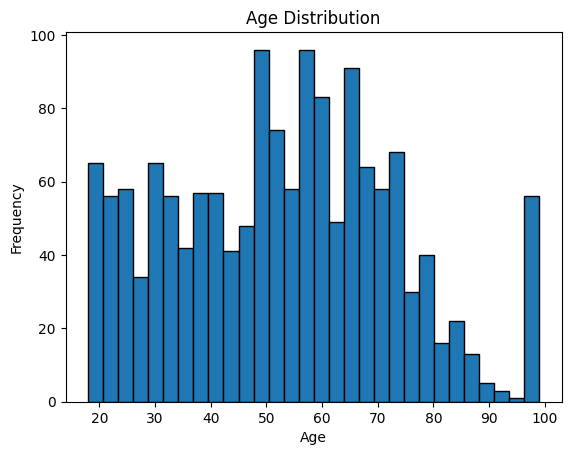

In [ ]:
# your Q2.3.1 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf
# your code here
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey - CSV.csv')

# Extract the 'age' column from the DataFrame
age_data = data['age']

# Create a histogram of the age distribution
plt.hist(age_data, bins=30, edgecolor='black')

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Display the histogram
plt.show()

### Q2.3.2 Alternate visualization

Now use your results and visualization from Q2.3.1 and find an alternate way to visualize it. You are encouraged to look at publicly available examples to guide you and can use any visualization package of your choice. Be creative!

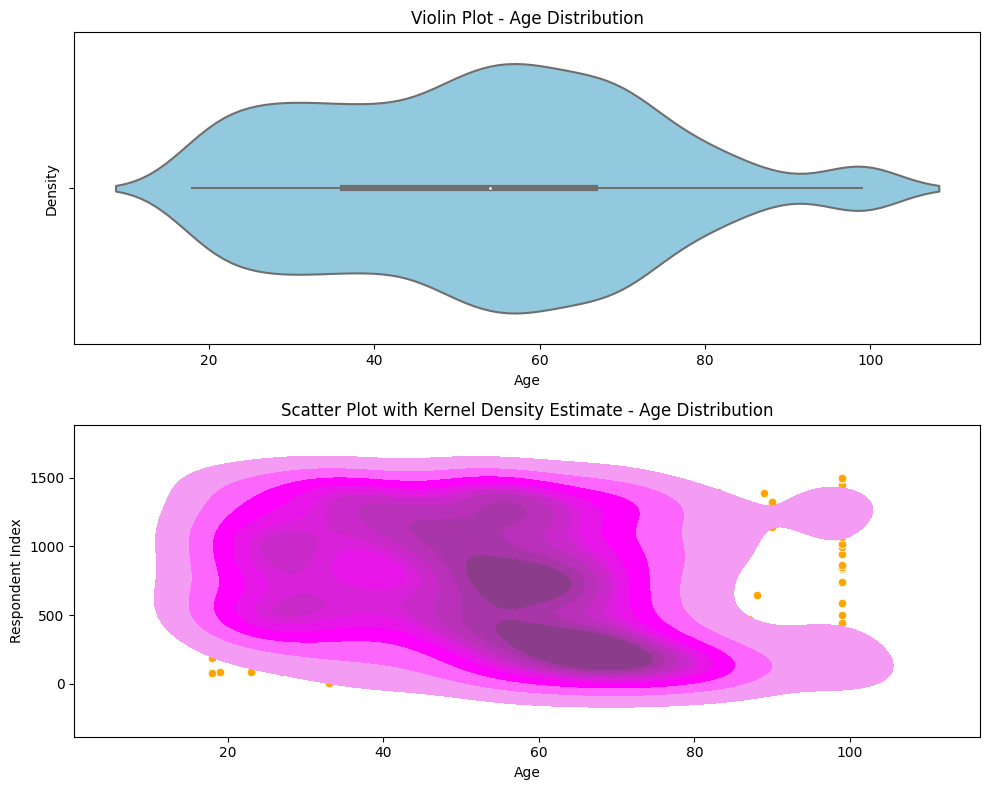

In [ ]:
# your Q2.3.2 visualization code should be included here
# Extract the 'age' column from the DataFrame
age_data = data['age']

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the violin plot on the first subplot
sns.violinplot(x=age_data, ax=ax1, color='skyblue')

# Plot the scatter plot on the second subplot
sns.scatterplot(x=age_data, y=age_data.index, ax=ax2, color='orange')

# Add a kernel density estimate on the second subplot
sns.kdeplot(x=age_data, y=age_data.index, ax=ax2, color='purple', fill=True)

# Set the labels and title for both subplots
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_title('Violin Plot - Age Distribution')

ax2.set_xlabel('Age')
ax2.set_ylabel('Respondent Index')
ax2.set_title('Scatter Plot with Kernel Density Estimate - Age Distribution')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the complex visualization
plt.show()

# Part 3: Error and loss functions (10%)

The last part is about implementing and explore some concepts that we have seen in the class.

## Implement the MSE and MAE
a) Implement MSE (mean Sqaured Error) by your own. Compare with the built-in function (from sklearn.metrics import mean_squared_error) by generating a random sequence of 10 numbers.
b) Implement MAE (mean absolute error) by your own. Compare with the built-in function (from sklearn.metrics import mean_absolute_error) by generating a random sequence of 10 numbers.


In [ ]:
# your code here - MSE

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate a random sequence of 10 numbers
np.random.seed(42)  # for reproducibility
true_values = np.random.rand(10)
predicted_values = true_values + np.random.normal(0, 0.1, 10)  # adding some noise

# a) Implement MSE
def mean_squared_error_custom(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MSE using custom implementation
mse_custom = mean_squared_error_custom(true_values, predicted_values)

# Calculate MSE using built-in function
mse_builtin = mean_squared_error(true_values, predicted_values)

# Display MSE values
print(f"MSE (Custom): {mse_custom}")
print(f"MSE (Built-in): {mse_builtin}")

MSE (Custom): 0.009081711855598945
MSE (Built-in): 0.009081711855598945


In [ ]:
# your code here - MAE
def mean_absolute_error_custom(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate MAE using custom implementation
mae_custom = mean_absolute_error_custom(true_values, predicted_values)

# Calculate MAE using built-in function
mae_builtin = mean_absolute_error(true_values, predicted_values)

# Display MAE values
print(f"MAE (Custom): {mae_custom}")
print(f"MAE (Built-in): {mae_builtin}")

MAE (Custom): 0.0771070820681117
MAE (Built-in): 0.0771070820681117


# Extra Credit (10%)
Explain what the Huber loss is and how it differs from traditional loss functions like Mean Squared Error (MSE). What role does the parameter
 δ play in the Huber loss function? Provide an example scenario where using Huber loss might be beneficial compared to using MSE.

The Huber loss is a loss function commonly used in regression tasks that combines the best properties of both the Mean Absolute Error (MAE) and Mean Squared Error (MSE) loss functions.
The difference between the MSE and Huber loss are:
Huber Loss is less sensitive to outliers than MSE and provides a more robust estimation of the model parameters.
The Huber loss function distinguishes itself from MSE by its treatment of outliers. Unlike MSE, which heavily penalizes large errors with a quadratic function, the Huber loss function applies a linear penalty to these errors, making it less susceptible to the influence of outliers.

The parameter δ in the Huber loss function is a crucial tuning parameter that determines the point at which the loss function switches from quadratic to linear. It controls how sensitive the loss function is to outliers. When the absolute difference between the true value and the predicted value is smaller than or equal to δ, the loss is calculated using the squared difference.

Let's consider a scenario where we are building a regression model to predict housing prices. Our data set contains a mix of normal data points and a few outliers that significantly deviate from the general trend. If we were to use MSE as the loss function, the large errors caused by the outliers would have a significant impact on the loss. By using the Huber loss function, we can build a regression model that is more resilient to outliers and provides more accurate predictions for the majority of the data points.

This was the last part of Homework 2. Now you need to submit your work following the instructions in the beginning of the notebook and you are done!